In [1]:
import os
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy import stats

In [18]:
dataPath = 'Data/2016-2019(NO2, NOX, PM2.5)'
listOfDataFrames=[]
stations=os.listdir(dataPath)
for station in stations:
    print("Processing year: "+ dataPath +" station: "+station)
    airQualityData=pd.read_csv(dataPath+'\\'+station, header=12,sep=';').rename(columns={'Start':'Start','Slut':'Stop'})
    airQualityData.rename(columns = lambda x: re.sub('NOX.*','NOX',x), inplace = True)
    airQualityData.rename(columns = lambda x: re.sub('PM10.*','PM10',x), inplace = True)
    airQualityData.rename(columns = lambda x: re.sub('PM2.5.*','PM2_5',x), inplace = True)
    airQualityData.rename(columns = lambda x: re.sub('NO2.*','NO2',x), inplace = True)
    listOfDataFrames.append(airQualityData)
airQualityData= pd.DataFrame(columns= [])
for airData in listOfDataFrames:
    airQualityData=airQualityData.append(airData)
    
airQualityData['Start'] = pd.to_datetime(airQualityData['Start'])
print(airQualityData.head(5))
print(airQualityData.shape)

Processing year: Data/2016-2019(NO2, NOX, PM2.5) station: shair-157992-1-6-3.csv
Processing year: Data/2016-2019(NO2, NOX, PM2.5) station: shair-18644-1-6-3.csv
Processing year: Data/2016-2019(NO2, NOX, PM2.5) station: shair-8779-1-6-3.csv
Processing year: Data/2016-2019(NO2, NOX, PM2.5) station: shair-8781-1-6-1.csv
                Start              Stop   NO2   NOX   PM10  PM2_5
0 2018-01-01 00:00:00  2018-01-01 01:00  20.2  22.1  31.90   22.8
1 2018-01-01 01:00:00  2018-01-01 02:00   8.8  10.6  11.00    7.9
2 2018-01-01 02:00:00  2018-01-01 03:00   5.5   7.1   6.15    4.4
3 2018-01-01 03:00:00  2018-01-01 04:00   5.3   7.6   6.20    4.5
4 2018-01-01 04:00:00  2018-01-01 05:00   6.6   9.3   8.00    5.7
(122712, 6)


#### View percentage of available data


<AxesSubplot:>

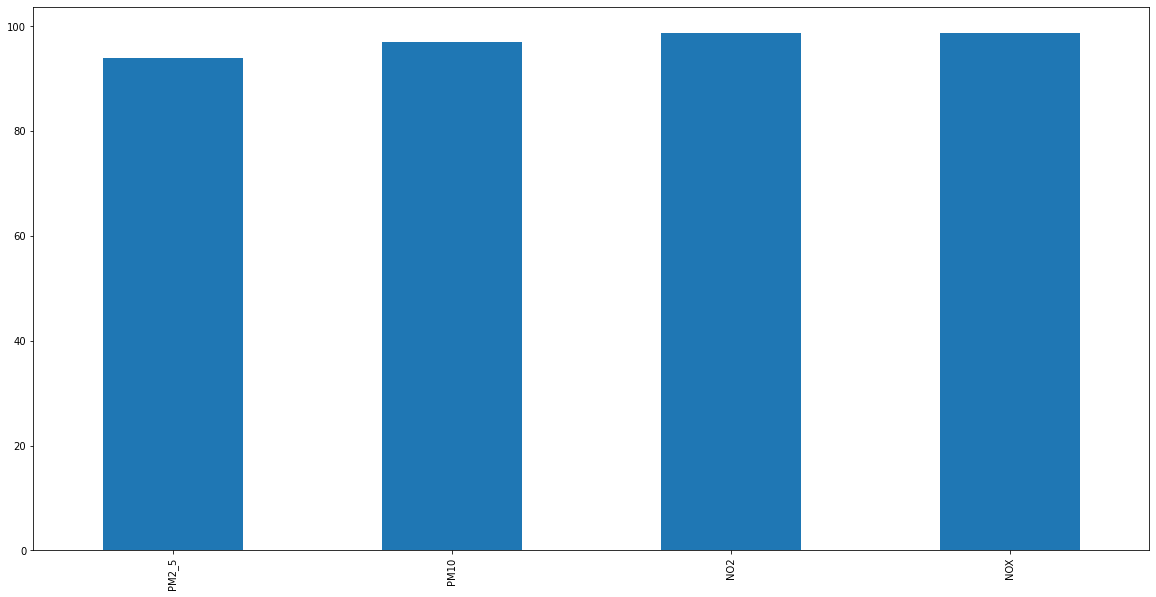

In [19]:
total = airQualityData.isnull().sum().sort_values(ascending = False)
total = total[airQualityData.isnull().sum().sort_values(ascending = False) != 0]
percent =  100 - total / len(airQualityData) * 100
percent[airQualityData.isnull().sum().sort_values(ascending = False) != 0].plot.bar(figsize = (20,10))

#### Viewing subset of data

<AxesSubplot:ylabel='PM10'>

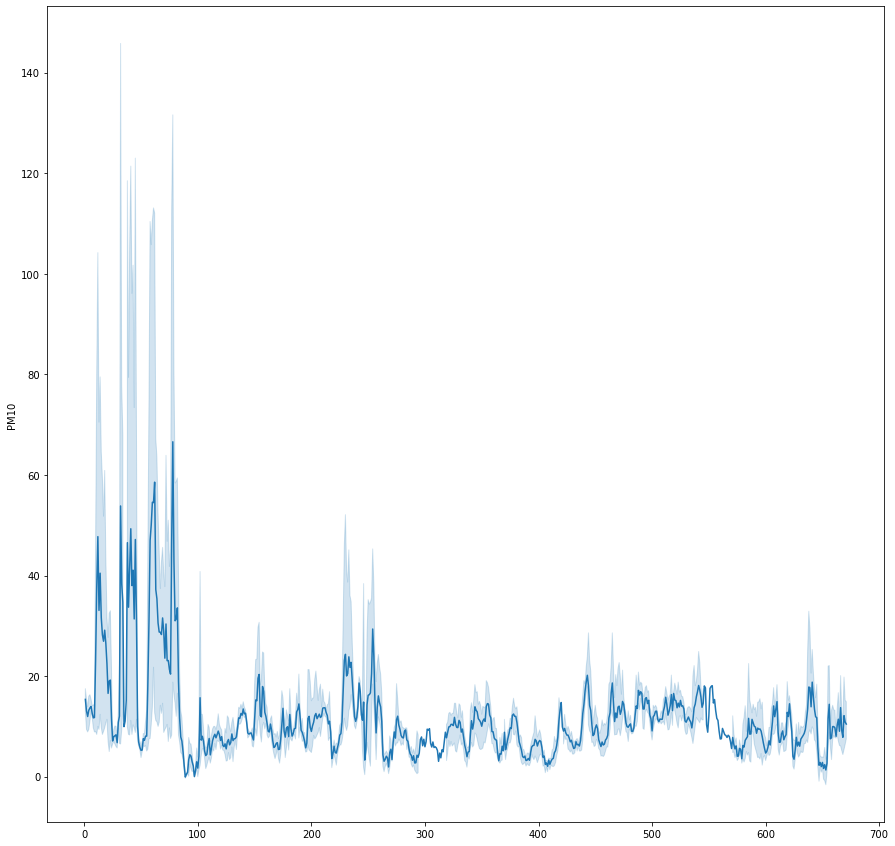

In [44]:
subsetData = airQualityData[(airQualityData['Start'] >"2016-01-01 00:00:00") & (airQualityData['Start'] < "2016-01-29 00:00:00")]
fig , ax =  plt.subplots(figsize=(15,15))
sns.lineplot(data=subsetData['PM10'],ax=ax)

In [20]:
#-------PERFORMING IMPUTATION---------------#
impute=airQualityData.drop(columns=['Stop'])
impute=impute.set_index('Start')
impute = impute.assign(PM10=impute['PM10'].interpolate(method='time'))
impute = impute.assign(NO2=impute['NO2'].interpolate(method='time'))
impute = impute.assign(NOX=impute['NOX'].interpolate(method='time'))
impute = impute.assign(PM2_5=impute['PM2_5'].interpolate(method='time'))

<AxesSubplot:>

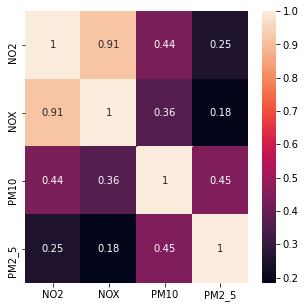

In [21]:
fig , ax =plt.subplots(figsize=(5,5))
sns.heatmap(impute.corr(), annot=True)

In [33]:
impute['PM2_5'].lt(0)

Start
2018-01-01 00:00:00    False
2018-01-01 01:00:00    False
2018-01-01 02:00:00    False
2018-01-01 03:00:00    False
2018-01-01 04:00:00    False
                       ...  
2019-12-31 19:00:00    False
2019-12-31 20:00:00    False
2019-12-31 21:00:00    False
2019-12-31 22:00:00    False
2019-12-31 23:00:00    False
Name: PM2_5, Length: 122712, dtype: bool